In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdp import rdp
import math

In [3]:
df = pd.read_csv('./hilton_preped.csv')
print(df.shape)
df.head()

(1175, 9)


,temp,pres,hum,accel,ts,run_id,floor,day_id,location
0,23.57,998.21,27.32,-0.49,2021-01-01 00:00:05,0,7,0,buffalo
1,23.52,998.15,27.36,-0.36,2021-01-01 00:00:06,0,7,0,buffalo
2,23.52,998.20,27.43,-0.30,2021-01-01 00:00:06,0,7,0,buffalo
3,23.52,998.20,27.48,-0.54,2021-01-01 00:00:07,0,7,0,buffalo
4,23.53,998.21,27.52,-0.13,2021-01-01 00:00:08,0,7,0,buffalo


<Axes: xlabel='None', ylabel='pres'>

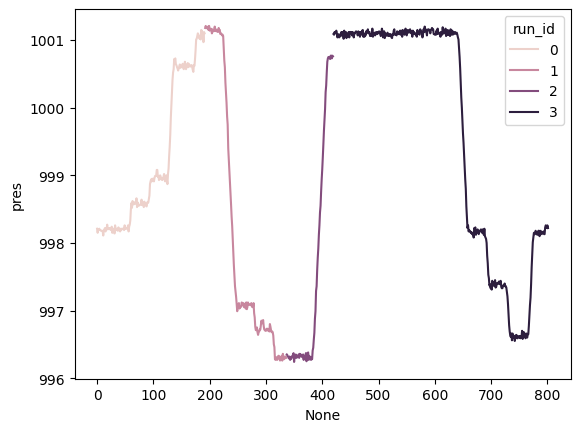

In [78]:
df_d1 = df[df['day_id'] == 0]
df_d2 = df[df['day_id'] == 1]
sns.lineplot(x=df_d1.index, y='pres', data=df_d1, hue='run_id')

In [4]:
df_00 = df[(df['run_id'] == 0) & (df['day_id'] == 0)]
df_00.shape

(192, 9)

<Axes: ylabel='pres'>

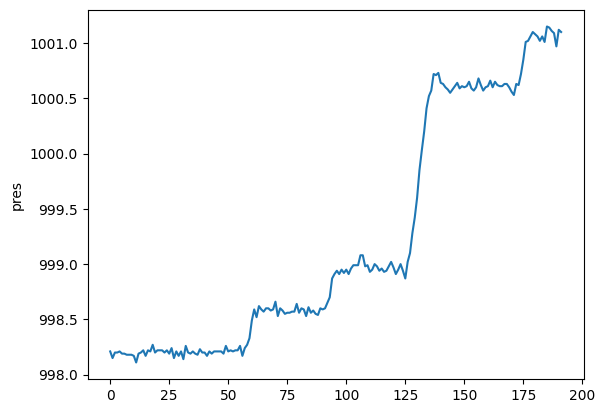

In [6]:
sns.lineplot(df_00['pres'])


In [167]:
def smooth(arr, span): 
    return np.convolve(arr, np.ones(span * 2 + 1) / (span * 2 + 1), mode='same')

def conv_smooth_with_average(arr, span):
    new_arr = smooth(arr, span)

    # The "average" part: shrinks the averaging window on the side that 
    # reaches beyond the data, keeps the other side the same size as given by "span"
    new_arr[0] = np.average(arr[:span])
    for i in range(1, span + 1):
        new_arr[i] = np.average(arr[:i + span])
        new_arr[-i] = np.average(arr[-i - span:])
    return new_arr

def simplify(arr, span):
    y = conv_smooth_with_average(arr, span)
    x = range(len(y))

    coords = []
    for i in range(len(y)):
        coords.append((i, y[i]))

    coords = np.array(coords)
    simplified = rdp(coords, 0.1)
    return simplified


In [26]:
spans = [3, 5, 7, 9]

smooth_dict = {}
for span in spans:
    arr = conv_smooth_with_average(df_00['pres'], span)
    smooth_dict[f'span{span}'] = arr

smooth_df = pd.DataFrame.from_dict(smooth_dict)
smooth_df.head()


,span3,span5,span7,span9
0,998.186667,998.194000,998.192857,998.190000
1,998.190000,998.193333,998.191250,998.189000
2,998.194000,998.192857,998.190000,998.187273
3,998.193333,998.191250,998.189000,998.180833
4,998.188571,998.190000,998.187273,998.181538


<Axes: >

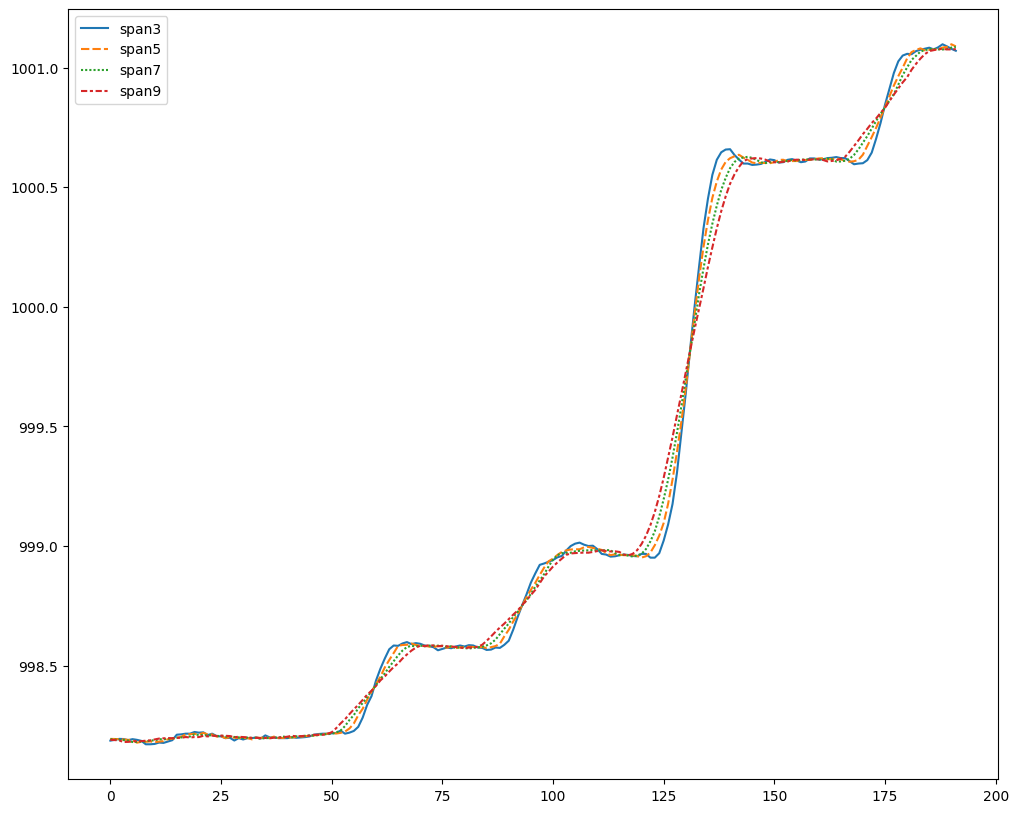

In [28]:
plt.figure(figsize=(12, 10))
sns.lineplot(smooth_df)

In [52]:
x = smooth_df.index.values
y = smooth_df['span5'].values

lst = []
for i in range(len(x)):
    lst.append((x[i], y[i]))

lst = np.array(lst)


In [53]:
lst.shape

(192, 2)

[[   0.          998.194     ]
 [  53.          998.22454545]
 [  65.          998.58272727]
 [  87.          998.58181818]
 [ 102.          998.97545455]
 [ 121.          998.95727273]
 [ 126.          999.17636364]
 [ 135.         1000.36181818]
 [ 139.         1000.60545455]
 [ 169.         1000.61454545]
 [ 181.         1001.06454545]
 [ 197.         1001.17727273]
 [ 219.         1001.11272727]
 [ 223.         1000.92545455]
 [ 228.         1000.36363636]
 [ 244.          997.60545455]
 [ 250.          997.12090909]
 [ 273.          997.08545455]
 [ 286.          996.71363636]
 [ 308.          996.70727273]
 [ 321.          996.29545455]
 [ 381.          996.37909091]
 [ 387.          996.93454545]
 [ 408.         1000.38090909]
 [ 412.         1000.68090909]
 [ 425.         1001.08818182]
 [ 637.         1001.08545455]
 [ 641.         1000.92090909]
 [ 644.         1000.61454545]
 [ 655.          998.80636364]
 [ 661.          998.23181818]
 [ 687.          998.13363636]
 [ 699. 

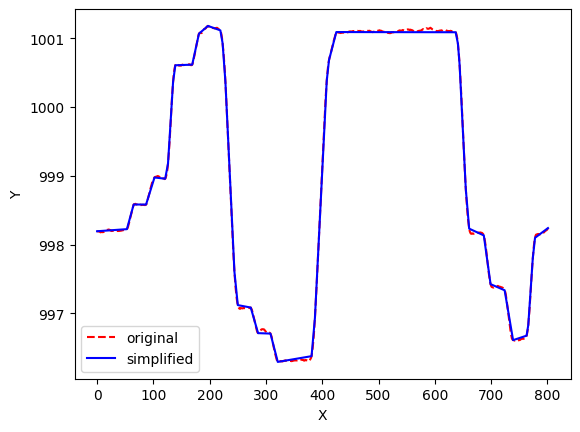

In [139]:
simplified = rdp(lst, 0.1)
print(simplified)
sx, sy = simplified.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'r--', label='original')
ax.plot(sx, sy, 'b-', label='simplified')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend(loc='best')


In [158]:
sx, sy

(array([  0.,  53.,  65.,  87., 102., 121., 126., 135., 139., 169., 181.,
        197., 219., 223., 228., 244., 250., 273., 286., 308., 321., 381.,
        387., 408., 412., 425., 637., 641., 644., 655., 661., 687., 699.,
        724., 739., 763., 766., 774., 778., 801.]),
 array([ 998.194     ,  998.22454545,  998.58272727,  998.58181818,
         998.97545455,  998.95727273,  999.17636364, 1000.36181818,
        1000.60545455, 1000.61454545, 1001.06454545, 1001.17727273,
        1001.11272727, 1000.92545455, 1000.36363636,  997.60545455,
         997.12090909,  997.08545455,  996.71363636,  996.70727273,
         996.29545455,  996.37909091,  996.93454545, 1000.38090909,
        1000.68090909, 1001.08818182, 1001.08545455, 1000.92090909,
        1000.61454545,  998.80636364,  998.23181818,  998.13363636,
         997.42545455,  997.33636364,  996.61181818,  996.67727273,
         996.83090909,  997.80090909,  998.09909091,  998.24      ]))

In [143]:
sx, sy = simplified.T
sx[0], sx[1]

(0.0, 53.0)

In [149]:
def comp_stats(arr, i, j):
    len = j - i + 1
    shift = math.floor(len * 0.1)
    start = int(i + shift)
    end = int(j - shift)
    sub_arr = arr[start:end]
    return np.mean(sub_arr), np.median(sub_arr), np.std(sub_arr), np.min(sub_arr), np.max(sub_arr)

def find_plateaus(pressures, simplified, thresh, labels=None):
    starts = []
    ends = []
    slopes = []
    means = []
    meds = []
    stds = []
    mins = []
    maxs = []
    floors = []
    sx, sy = simplified.T
    for i in range(len(sx) - 1):
        slope = (sy[i+1] - sy[i]) / (sx[i+1] - sx[i])
        if abs(slope) < thresh:
            mean, med, std, mn, mx = comp_stats(pressures, sx[i], sx[i+1])
            starts.append(sx[i])
            ends.append(sx[i+1])
            slopes.append(slope)
            means.append(mean)
            meds.append(med)
            stds.append(std)
            mins.append(mn)
            maxs.append(mx)
            if labels is not None:
                floors.append(labels[int(sx[i])])
    
    rs_df = pd.DataFrame(
        {
            'Start': starts,
            'End': ends,
            'Slope': slopes,
            'Mean': means,
            'Median': meds,
            'STD': stds
        }
    )

    if labels is not None:         
        rs_df = pd.DataFrame(
            {
            'Start': starts,
            'End': ends,
            'Slope': slopes,
            'Mean': means,
            'Median': meds,
            'STD': stds,
            'Min': mins,
            'Max': maxs,
            'Floor': floors
            }
        )

    return rs_df

rs_df = find_plateaus(df_d1['pres'].values, simplified, 0.005, df_d1['floor'].values)
rs_df.sort_values(by='Floor')


,Start,End,Slope,Mean,Median,STD,Min,Max,Floor
4,197.0,219.0,-0.002934,1001.149444,1001.145,0.026765,1001.10,1001.21,-1
8,425.0,637.0,-0.000013,1001.105882,1001.100,0.034938,1001.03,1001.20,-1
3,139.0,169.0,0.000303,1000.608333,1000.605,0.029954,1000.55,1000.68,1
2,102.0,121.0,-0.000957,998.981333,998.980,0.044850,998.93,999.08,5
1,65.0,87.0,-0.000041,998.582222,998.580,0.032923,998.53,998.66,6
0,0.0,53.0,0.000576,998.198605,998.200,0.028250,998.11,998.27,7
9,661.0,687.0,-0.003776,998.165455,998.170,0.034867,998.08,998.23,7
10,699.0,724.0,-0.003564,997.385714,997.390,0.039710,997.31,997.45,9
5,250.0,273.0,-0.001542,997.075789,997.080,0.032006,997.02,997.12,10
6,286.0,308.0,-0.000289,996.748333,996.725,0.053877,996.69,996.86,11


In [154]:
def calibrate(pressures, span=5, slope_thresh=0.005, labels=None):
    x = range(len(pressures))
    y = conv_smooth_with_average(pressures, span)
    trajectory = []
    for i in range(len(x)):
        trajectory.append((x[i], y[i]))

    trajectory = np.array(trajectory)
    simplified = rdp(trajectory, 0.1)
    rs_df = find_plateaus(pressures, simplified, slope_thresh, labels)
    sorted_pressures = np.sort(rs_df['Mean'])[::-1]
    max_std = np.max(rs_df['STD'])
    deltas = []
    base_pres = sorted_pressures[0]
    for i in range(1, len(rs_df)):
        delta = base_pres - sorted_pressures[i]
        deltas.append(delta)
    return rs_df, base_pres, deltas, max_std

rs, base_pres, deltas, max_std = calibrate(df_00['pres'].values)
rs, deltas, max_std

(   Start    End     Slope         Mean    Median       STD
 0    0.0   53.0  0.000576   998.198605   998.200  0.028250
 1   65.0   87.0 -0.000041   998.582222   998.580  0.032923
 2  102.0  121.0 -0.000957   998.981333   998.980  0.044850
 3  139.0  169.0  0.000303  1000.608333  1000.605  0.029954
 4  181.0  191.0  0.002379  1001.068750  1001.075  0.060712,
 [0.46041666666667425,
  2.0874166666663996,
  2.4865277777777237,
  2.870145348837127],
 0.06071192222289956)

In [134]:
import configparser
from datetime import date
def log_calibration(base_pres, deltas, std):
    today = date.today()
    dt_str = today.strftime('%m/%d/%y')
    config = configparser.ConfigParser()
    config['DEFAULT'] = {
        'base_pres': base_pres,
        'Deltas': deltas,
        'std_dev': std,
        'Date': dt_str
    }
    with open('./config.ini', 'w') as configfile:
        config.write(configfile)

log_calibration(base_pres, deltas, max_std)

In [179]:
def get_elevator_status(bp_default, deltas, std, bp_current, readings):
    std_2 = std * 2
    print(std_2)
    simplified = simplify(readings, 5)
    sx, sy = simplified.T
    print(sx)
    print(sy)
    cnt = len(sx)
    slope = (sy[cnt-1] - sy[cnt-2]) / (sx[cnt-1] - sx[cnt-2])
    if slope > 0.005:
        print('Down')
    elif slope < -0.005:
        print('Up')
    else:
        avg = (sy[cnt-1] + sy[cnt-2]) / 2
        print(avg - bp_current)
        if abs(avg - bp_current)  < std_2:
            return 0
        for i, d in enumerate(deltas):
            pres = bp_default - float(d)
            if abs(avg - pres) < std_2:
                return i + 1

<Axes: ylabel='pres'>

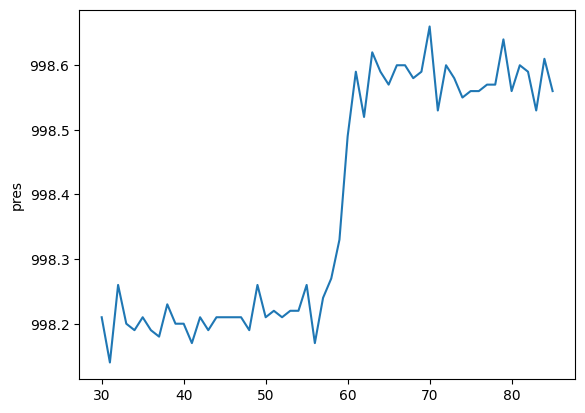

In [170]:
seq = df_00.loc[30:85, 'pres']
sns.lineplot(seq)

In [181]:
config = configparser.ConfigParser()
config.read('./config.ini')
bp_default = config['DEFAULT']['base_pres']
deltas = config['DEFAULT']['deltas']
print(deltas)
std = float(config['DEFAULT']['std_dev'])
get_elevator_status(bp_default, deltas, std, 1001.0687, seq.values)

[0.46041666666667425, 2.0874166666663996, 2.4865277777777237, 2.870145348837127]
0.12142384444579912
[ 0. 23. 35. 55.]
[998.2        998.22454545 998.58272727 998.575     ]
-2.489836363636641


ValueError: could not convert string to float: '['